# Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions. 
# Q2. Load the Wine Quality dataset and explore its dimensions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,minmax_scale,LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

In [2]:
# Checking version of Tensorflow and Keras
print(f"Tensorflow Version {tf.__version__}")
#print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.15.0


## GPU / CPU Check

In [3]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU isn't available!
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [4]:
df = pd.read_csv("wine.csv")

In [5]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


## Q3. Check for null values, identify categorical variables, and encode them.

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [9]:
# shape of the dataset
df.shape

(1599, 12)

In [10]:
#list down all columns
list(df.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [11]:
#dropping duplcates records
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,bad
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,bad
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,bad
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,bad
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,bad
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,bad
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,bad


In [12]:
df = df.drop_duplicates()

In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
encoder = LabelEncoder()

In [15]:
encoded_quality = encoder.fit_transform(df['quality'])

In [16]:
df = df.drop(['quality'],axis = 1)

In [17]:
df['quality'] = encoded_quality

In [18]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


<AxesSubplot: >

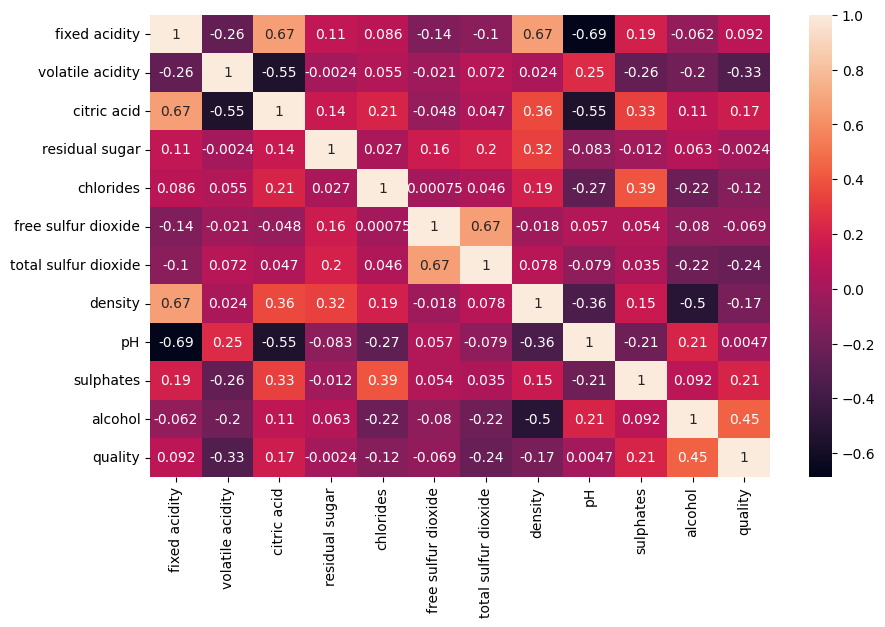

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot = True)

In [20]:
df.corr()['quality']

fixed acidity           0.091761
volatile acidity       -0.327195
citric acid             0.167903
residual sugar         -0.002371
chlorides              -0.115071
free sulfur dioxide    -0.069207
total sulfur dioxide   -0.235046
density                -0.168958
pH                      0.004693
sulphates               0.211365
alcohol                 0.446176
quality                 1.000000
Name: quality, dtype: float64

# Observation
quality feature is higlhy correlated with alcohol,sulphates,citric acid

# Q4. Separate the features and target variables from the dataframe.

In [21]:
X = df.drop(['quality'],axis = 1)

In [22]:
y = df['quality']

## Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [24]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.20,random_state=42)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(869, 11)
(272, 11)
(218, 11)
(869,)
(272,)
(218,)


## Q6. Perform scaling on the dataset.

In [26]:
scaler = StandardScaler()

In [27]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#X_train = minmax_scale(X_train)
#X_val = minmax_scale(X_val)
#X_test = minmax_scale(X_test)

## Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

## Q8. Create a Sequential model and add all the layers to it.
## Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.
## Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.
## Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.
## Q12. Print the model summary.
## Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy']. 
## Q14. Compile the model with the specified loss function, optimizer, and metrics.
## Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.
## Q16. Get the model's parameters.
## Q17. Store the model's training history as a Pandas DataFrame.
## Q18. Plot the model's training history. 
## Q19. Evaluate the model's performance using the test data.

In [42]:
model = Sequential()

In [43]:
model.add(Dense(18,activation='relu',input_dim=11,kernel_regularizer=tf.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
model.add(Dense(12,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(8,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 18)                216       
                                                                 
 dense_5 (Dense)             (None, 12)                228       
                                                                 
 batch_normalization_2 (Bat  (None, 12)                48        
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 12)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 batch_normalization_3 (Bat  (None, 8)                 32        
 chNormalization)                                     

In [45]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.001)
model.compile(optimizer= 'adam', loss= 'binary_crossentropy',metrics = ['accuracy'])

In [46]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_model.h5", save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir="logs")

CALLBACKS = [checkpoint_cb, early_stopping_cb, tensorboard_cb]

history = model.fit( X_train, y_train, epochs= 50,batch_size = 100,validation_data=(X_val, y_val), callbacks = CALLBACKS)


Epoch 1/50
9/9 [==============================] - 2s 44ms/step - loss: 0.8960 - accuracy: 0.4833 - val_loss: 0.7987 - val_accuracy: 0.4771
Epoch 2/50
9/9 [==============================] - 0s 12ms/step - loss: 0.8670 - accuracy: 0.4960 - val_loss: 0.7736 - val_accuracy: 0.5092
Epoch 3/50
1/9 [==>...........................] - ETA: 0s - loss: 0.8388 - accuracy: 0.5100

C:\Users\getan\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 0s 11ms/step - loss: 0.8069 - accuracy: 0.5409 - val_loss: 0.7530 - val_accuracy: 0.5275
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.7701 - accuracy: 0.5857 - val_loss: 0.7331 - val_accuracy: 0.5550
Epoch 5/50
9/9 [==============================] - 0s 13ms/step - loss: 0.7617 - accuracy: 0.6007 - val_loss: 0.7174 - val_accuracy: 0.5780
Epoch 6/50
9/9 [==============================] - 0s 12ms/step - loss: 0.7441 - accuracy: 0.6018 - val_loss: 0.7052 - val_accuracy: 0.6193
Epoch 7/50
9/9 [==============================] - 0s 16ms/step - loss: 0.7262 - accuracy: 0.6341 - val_loss: 0.6951 - val_accuracy: 0.6376
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.7130 - accuracy: 0.6559 - val_loss: 0.6867 - val_accuracy: 0.6606
Epoch 9/50
9/9 [==============================] - 0s 16ms/step - loss: 0.6926 - accuracy: 0.6605 - val_loss: 0.6792 - val_accuracy: 0.6606
Epoch 10/50
9/9 [=====================

In [48]:
model.layers[0].get_weights()

[array([[ 0.11688865, -0.38037917,  0.1620594 , -0.11130104, -0.35602665,
         -0.16717726, -0.08280521,  0.54014784, -0.25364283,  0.17148244,
         -0.2894039 , -0.4110265 ,  0.8418876 , -0.3626579 ,  0.47472882,
          0.11731796,  0.52905506,  0.01647913],
        [-0.1525306 ,  0.1514324 , -0.46395487,  0.62663233,  0.724081  ,
          0.3166059 ,  0.15781622,  0.18365437,  0.5976692 , -0.70046735,
         -0.07082108,  0.57243913,  0.70295435, -0.02217357, -0.56230503,
         -0.26071525, -0.6233062 ,  0.21213825],
        [ 0.26957193, -0.6245585 , -0.34564465,  0.28480488,  0.10694867,
         -0.0492314 , -0.62481695, -0.6326926 , -0.0693541 ,  0.37888303,
         -0.6902412 , -0.31627205, -0.18329862,  0.1471052 , -0.44979468,
         -0.24270971,  0.3783687 ,  0.45969105],
        [-0.01960491, -0.5868168 ,  0.18306309, -0.6720504 , -0.22889404,
         -0.1861149 , -0.39259505,  0.23214726,  0.31307012, -0.33703297,
         -0.5706855 ,  0.30917674,  0.2

In [49]:
y_log = model.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [50]:
y_pred = np.where(y_log>0.5,1,0)

In [51]:
accuracy_score(y_test,y_pred)

0.7316176470588235

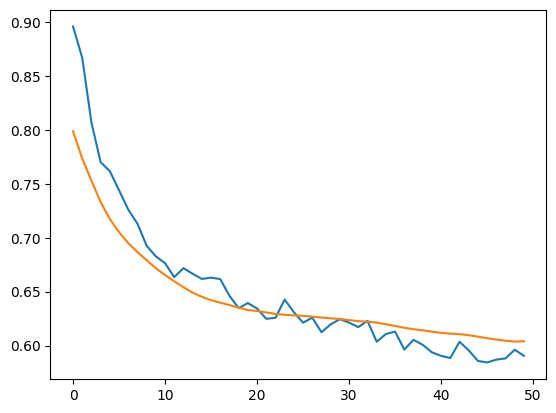

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

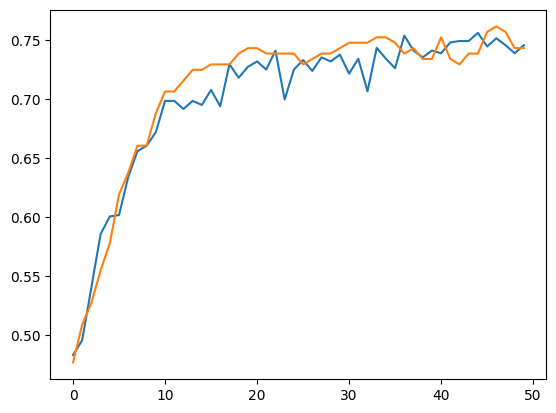

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

<AxesSubplot: >

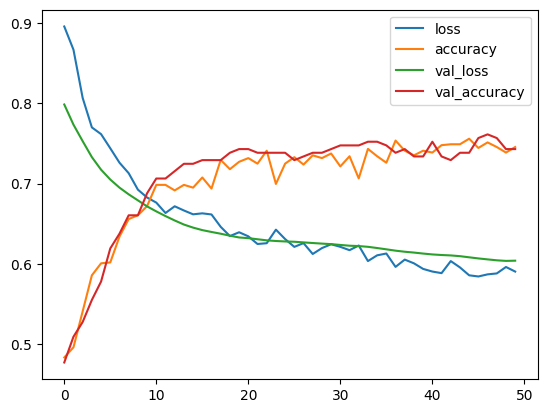

In [54]:
pd.DataFrame(history.history).plot()

In [55]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [56]:
%tensorboard --logdir="logs"

Reusing TensorBoard on port 6006 (pid 14388), started 1 day, 13:10:57 ago. (Use '!kill 14388' to kill it.)